## Backpropagation on a Synthetic Credit-Risk Dataset

This notebook implements and demonstrates backpropagation for a small feedforward neural network, using a synthetic credit-risk dataset generated by the `income` function.

### What this notebook does

1. **Imports and dataset generation**  
   - Imports `numpy`, `pandas`, `matplotlib`, and scikit-learn utilities.  
   - Defines the `income(number_of_samples, seed)` function, which creates a synthetic dataset of borrowers with features such as age, annual income, debt-to-income ratio, credit history, number of late payments, home ownership, and employment years.  
   - Inside `income`, a latent risk score is computed from normalised features, noise is added, a sigmoid converts this to a default probability, and a Bernoulli sample gives the final `default` label.

2. **Train/test split and standardisation**  
   - Uses `train_test_split` to split the generated data into training and test sets.  
   - Applies `StandardScaler` so that all input features have zero mean and unit variance, which usually makes training with gradient descent more stable.

3. **Helper functions**  
   - Defines activation and utility functions: `sigmoid`, `relu`, `relu_deriv`, `binary_cross_entropy`, and `accuracy`.  
   - These are used by the neural-network forward and backward passes.

4. **Network parameters and forward pass**  
   - `init_params(hidden_units, seed)` initialises weights and biases for a 1-hidden-layer network: 7 input features → 8 hidden units → 1 output unit.  
   - `forward(X, params)` computes:  
     - `z1 = X @ W1 + b1` (hidden pre-activation),  
     - `h = ReLU(z1)` (hidden activation),  
     - `z2 = h @ W2 + b2` (output pre-activation),  
     - `y_hat = sigmoid(z2)` (predicted default probabilities).  
   - It returns both the predictions and a `cache` of intermediate values needed for backpropagation.

5. **Backpropagation (backward pass)**  
   - `backward(X, y, y_hat, cache, params)` implements backpropagation for this network:  
     - Computes the output error `dz2 = y_hat - y`, which corresponds to the derivative of the binary cross-entropy loss with a sigmoid output.  
     - Uses this to get gradients for the second-layer weights and biases (`dW2`, `db2`).  
     - Propagates error back into the hidden layer (`dh = dz2 @ W2.T`), multiplies by the ReLU derivative to get `dz1`, and then computes gradients `dW1` and `db1` for the first layer.  
   - This is the core of the backpropagation algorithm: applying the chain rule layer by layer.

6. **Training loop and experiments**  
   - `train_model(...)` runs training for a given number of epochs and learning rate. Each epoch:  
     1. Runs a forward pass to compute predictions and loss.  
     2. Calls `backward` to compute gradients.  
     3. Updates all parameters with gradient descent.  
   - The notebook uses this to run two key experiments:  
     - **Forward-only (no learning)**: runs forward and computes loss, but never updates weights. The loss and accuracy remain almost flat.  
     - **Forward + backpropagation**: runs forward, backward, and updates. The training loss decreases and accuracy improves over epochs, demonstrating actual learning.

7. **Learning-rate comparison**  
   - Trains the same network with different learning rates (e.g. 0.001, 0.01, 0.1).  
   - Plots how the training loss behaves under each learning rate, illustrating that:  
     - very small learning rates converge slowly,  
     - moderate learning rates converge well,  
     - large learning rates can cause unstable or diverging behaviour.

8. **Single-example walkthrough and gradient checking**  
   - Runs forward and backward on a **single training example** to show the shapes of intermediate quantities and gradients.  
   - Performs **gradient checking** on one weight by comparing:  
     - the analytic gradient from `backward`, and  
     - a numerical gradient computed via finite differences.  
   - If these match closely, it provides evidence that the backpropagation implementation is correct.

Overall, this notebook supports the tutorial report by providing *executable code* that demonstrates:
- how the forward pass computes predictions and loss,  
- how backpropagation computes gradients via the chain rule, and  
- how gradient descent uses those gradients to make the network learn over time.


Data shape: (2000, 7) Labels shape: (2000,)
   age  annual_income  debt_to_income  credit_history_years  \
0   67   16756.035906        0.164427             26.556127   
1   54  126747.994177        0.794970             20.719364   
2   47   81992.846896        0.173588             14.460212   
3   33   73848.938851        0.460746             20.385244   
4   35   96242.286611        0.129342             25.072763   

   num_late_payments  owns_home  employment_years  default  
0                  0          1         19.470684        0  
1                  5          1         23.848030        0  
2                 17          1         38.037895        0  
3                 20          1         27.295560        1  
4                 14          0          0.276586        1  

=== Experiment 1: Forward-only (no learning) ===
[FORWARD ONLY] Epoch  20 | train loss=0.6917, test loss=0.6917, train acc=0.509, test acc=0.510
[FORWARD ONLY] Epoch  40 | train loss=0.6917, test loss=0.6917, t

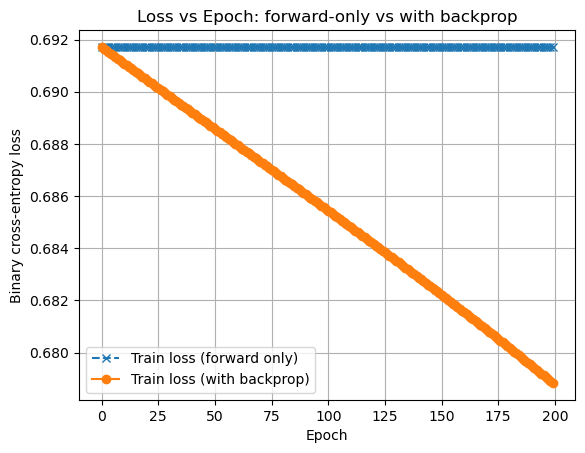

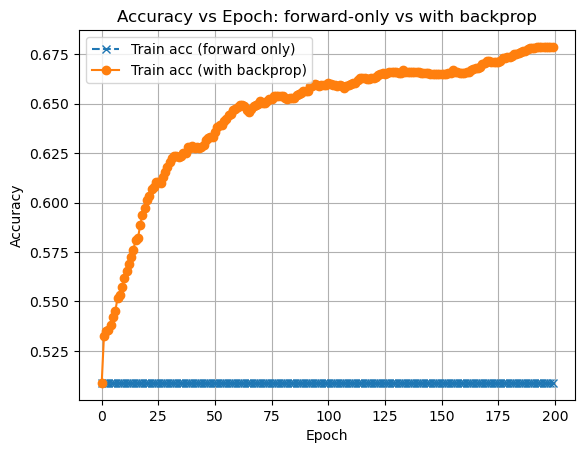


=== Experiment 3: Learning rate effects ===

Training with learning rate = 0.001
[LEARN] Epoch  20 | train loss=0.6916, test loss=0.6915, train acc=0.536, test acc=0.515
[LEARN] Epoch  40 | train loss=0.6915, test loss=0.6914, train acc=0.539, test acc=0.520
[LEARN] Epoch  60 | train loss=0.6913, test loss=0.6913, train acc=0.544, test acc=0.522
[LEARN] Epoch  80 | train loss=0.6912, test loss=0.6912, train acc=0.554, test acc=0.530
[LEARN] Epoch 100 | train loss=0.6911, test loss=0.6911, train acc=0.562, test acc=0.535
[LEARN] Epoch 120 | train loss=0.6910, test loss=0.6909, train acc=0.569, test acc=0.545
[LEARN] Epoch 140 | train loss=0.6908, test loss=0.6908, train acc=0.576, test acc=0.555
[LEARN] Epoch 160 | train loss=0.6907, test loss=0.6907, train acc=0.582, test acc=0.578
[LEARN] Epoch 180 | train loss=0.6906, test loss=0.6906, train acc=0.594, test acc=0.580
[LEARN] Epoch 200 | train loss=0.6905, test loss=0.6905, train acc=0.601, test acc=0.588

Training with learning rate

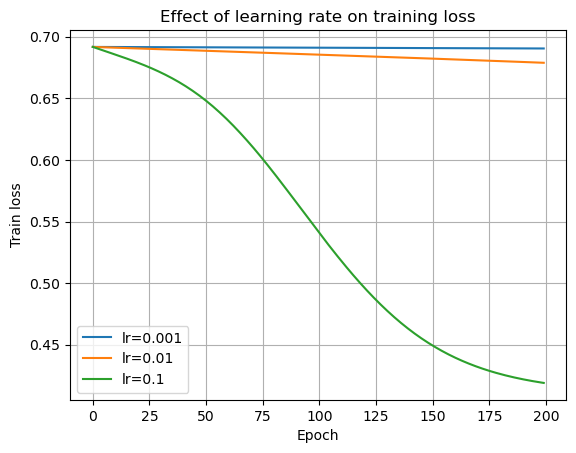


=== Single-example forward + backward walkthrough ===
x_sample: [[ 1.30566779 -1.15066174 -1.64912415  1.48034603  1.31111516 -0.996257
  -0.94866483]]
y_sample: [[1]]
y_hat_sample: [[0.51665948]]
loss_sample: 0.6603712743459406
dW1 shape: (7, 8)
db1 shape: (1, 8)
dW2 shape: (8, 1)
db2 shape: (1, 1)

=== Gradient checking for one weight (W1[0,0]) ===
Analytic gradient: -0.009645202333075479
Numeric gradient : -0.009645202336816538
Absolute difference: 3.741059545481207e-12


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# creating a dataset
def income(number_of_samples=3000, seed=42):
    rng = np.random.default_rng(seed)

    # Features
    Age = rng.integers(18, 76, number_of_samples)
    Annual_income = rng.uniform(15_000, 150_000, size=number_of_samples)
    Debt_to_income = rng.uniform(0.0, 1.0, size=number_of_samples)
    Credit_history = rng.uniform(0, 30, size=number_of_samples)
    Number_of_late_payments = rng.integers(0, 21, size=number_of_samples)
    Owns_home = rng.integers(0, 2, size=number_of_samples)  # 0 or 1
    Employment_years = rng.uniform(0, 40, size=number_of_samples)

    X = np.column_stack([
        Age,
        Annual_income,
        Debt_to_income,
        Credit_history,
        Number_of_late_payments,
        Owns_home,
        Employment_years
    ])

    # Normalised versions for underlying "true" risk model
    age_norm = (Age - 40) / 15.0
    income_norm = (Annual_income - 50_000) / 20_000.0
    dti = Debt_to_income
    history_norm = (Credit_history - 10) / 5.0
    late_norm = Number_of_late_payments / 5.0
    home = Owns_home
    emp_norm = (Employment_years - 5) / 5.0

    score = (
        + 1.2 * dti
        + 0.9 * late_norm
        - 0.8 * income_norm
        - 0.6 * history_norm
        - 0.4 * emp_norm
        + 0.3 * (1 - home)      # renting slightly higher risk
        + 0.2 * age_norm
    )

    # Add noise so it’s not perfectly separable
    noise = rng.normal(0, 0.5, size=number_of_samples)
    score_noisy = score + noise

    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    default_prob = sigmoid(score_noisy)
    default = rng.binomial(1, default_prob)

    y = default

    df = pd.DataFrame({
        "age": Age,
        "annual_income": Annual_income,
        "debt_to_income": Debt_to_income,
        "credit_history_years": Credit_history,
        "num_late_payments": Number_of_late_payments,
        "owns_home": Owns_home,
        "employment_years": Employment_years,
        "default": y
    })

    return X, y, df


# 2. Generate and preprocess data

X, y, df = income(number_of_samples=2000, seed=0)

print("Data shape:", X.shape, "Labels shape:", y.shape)
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

n_features = X_train.shape[1]


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    # derivative of sigmoid when given a = sigmoid(z)
    return a * (1 - a)

def relu(z):
    return np.maximum(0, z)

def relu_deriv(z):
    return (z > 0).astype(float)

def binary_cross_entropy(y_true, y_pred, eps=1e-8):
    y_pred = np.clip(y_pred, eps, 1 - eps)
    loss = - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return np.mean(loss)

def accuracy(y_true, y_pred):
    preds = (y_pred >= 0.5).astype(int)
    return np.mean(preds == y_true)

# 4. Forward and backward passes
def init_params(hidden_units=8, seed=0):
    rng = np.random.default_rng(seed)
    W1 = rng.normal(0, 0.1, size=(n_features, hidden_units))
    b1 = np.zeros((1, hidden_units))
    W2 = rng.normal(0, 0.1, size=(hidden_units, 1))
    b2 = np.zeros((1, 1))
    return {"W1": W1, "b1": b1, "W2": W2, "b2": b2}

def forward(X, params):
    W1, b1, W2, b2 = params["W1"], params["b1"], params["W2"], params["b2"]
    z1 = X @ W1 + b1
    h = relu(z1)
    z2 = h @ W2 + b2
    y_hat = sigmoid(z2)
    cache = {"z1": z1, "h": h, "z2": z2}
    return y_hat, cache

def backward(X, y, y_hat, cache, params):
    """
    Implements backprop for one batch.
    Returns gradients for each parameter.
    """
    W2 = params["W2"]
    z1, h, z2 = cache["z1"], cache["h"], cache["z2"]
    N = X.shape[0]

    # Output layer
    dz2 = y_hat - y          # (N, 1)
    dW2 = h.T @ dz2 / N      # (hidden, N) x (N,1) -> (hidden,1)
    db2 = dz2.mean(axis=0, keepdims=True)

    # Hidden layer
    dh = dz2 @ W2.T          # (N,1) x (1,hidden) -> (N,hidden)
    dz1 = dh * relu_deriv(z1)
    dW1 = X.T @ dz1 / N      # (features,N) x (N,hidden) -> (features,hidden)
    db1 = dz1.mean(axis=0, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

def update_params(params, grads, lr):
    params["W1"] -= lr * grads["dW1"]
    params["b1"] -= lr * grads["db1"]
    params["W2"] -= lr * grads["dW2"]
    params["b2"] -= lr * grads["db2"]
    return params

# 5. Training loop function

def train_model(X_train, y_train, X_test, y_test,
                epochs=200, lr=0.01, hidden_units=8,
                do_updates=True, seed=0):
    params = init_params(hidden_units=hidden_units, seed=seed)

    train_losses, test_losses = [], []
    train_accs, test_accs = [], []

    for epoch in range(epochs):
        # Forward on train
        y_hat, cache = forward(X_train, params)
        loss = binary_cross_entropy(y_train, y_hat)
        train_acc = accuracy(y_train, y_hat)

        # Forward on test (monitor only)
        y_hat_test, _ = forward(X_test, params)
        loss_test = binary_cross_entropy(y_test, y_hat_test)
        test_acc = accuracy(y_test, y_hat_test)

        train_losses.append(loss)
        test_losses.append(loss_test)
        train_accs.append(train_acc)
        test_accs.append(test_acc)

        # Backprop + update
        if do_updates:
            grads = backward(X_train, y_train, y_hat, cache, params)
            params = update_params(params, grads, lr)

        if (epoch + 1) % 20 == 0:
            mode = "LEARN" if do_updates else "FORWARD ONLY"
            print(f"[{mode}] Epoch {epoch+1:3d} | "
                  f"train loss={loss:.4f}, test loss={loss_test:.4f}, "
                  f"train acc={train_acc:.3f}, test acc={test_acc:.3f}")

    history = {
        "train_loss": train_losses,
        "test_loss": test_losses,
        "train_acc": train_accs,
        "test_acc": test_accs,
        "params": params
    }
    return history

# 6. Experiment 1: Forward-only vs backprop

epochs = 200
seed = 0

print("\n=== Experiment 1: Forward-only (no learning) ===")
history_forward_only = train_model(
    X_train, y_train, X_test, y_test,
    epochs=epochs, lr=0.01, do_updates=False, seed=seed
)

print("\n=== Experiment 2: With backprop + gradient descent ===")
history_backprop = train_model(
    X_train, y_train, X_test, y_test,
    epochs=epochs, lr=0.01, do_updates=True, seed=seed
)

# Plot loss curves
plt.figure()
plt.plot(history_forward_only["train_loss"], linestyle='--', marker='x', label="Train loss (forward only)")
plt.plot(history_backprop["train_loss"], linestyle='-', marker='o', label="Train loss (with backprop)")
plt.xlabel("Epoch")
plt.ylabel("Binary cross-entropy loss")
plt.title("Loss vs Epoch: forward-only vs with backprop")
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy curves
plt.figure()
plt.plot(history_forward_only["train_acc"], linestyle='--', marker='x', label="Train acc (forward only)")
plt.plot(history_backprop["train_acc"], linestyle='-', marker='o', label="Train acc (with backprop)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch: forward-only vs with backprop")
plt.legend()
plt.grid(True)
plt.show()

# 7. Experiment 2: Learning rate effects
learning_rates = [0.001, 0.01, 0.1]
lr_histories = {}

print("\n=== Experiment 3: Learning rate effects ===")
for lr in learning_rates:
    print(f"\nTraining with learning rate = {lr}")
    hist = train_model(
        X_train, y_train, X_test, y_test,
        epochs=epochs, lr=lr, do_updates=True, seed=seed
    )
    lr_histories[lr] = hist

plt.figure()
for lr in learning_rates:
    plt.plot(lr_histories[lr]["train_loss"], label=f"lr={lr}")
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.title("Effect of learning rate on training loss")
plt.legend()
plt.grid(True)
plt.show()

# 8. Single-example backprop walkthrough
print("\n=== Single-example forward + backward walkthrough ===")
params_example = init_params(hidden_units=8, seed=0)
x_sample = X_train[:1]
y_sample = y_train[:1]

y_hat_sample, cache_sample = forward(x_sample, params_example)
loss_sample = binary_cross_entropy(y_sample, y_hat_sample)

print("x_sample:", x_sample)
print("y_sample:", y_sample)
print("y_hat_sample:", y_hat_sample)
print("loss_sample:", loss_sample)

grads_sample = backward(x_sample, y_sample, y_hat_sample, cache_sample, params_example)
print("dW1 shape:", grads_sample["dW1"].shape)
print("db1 shape:", grads_sample["db1"].shape)
print("dW2 shape:", grads_sample["dW2"].shape)
print("db2 shape:", grads_sample["db2"].shape)

# 9. Gradient checking for one parameter
print("\n=== Gradient checking for one weight (W1[0,0]) ===")
epsilon = 1e-5

# small batch
X_batch = X_train[:10]
y_batch = y_train[:10]

params_gc = init_params(hidden_units=8, seed=1)
y_hat_gc, cache_gc = forward(X_batch, params_gc)
grads_gc = backward(X_batch, y_batch, y_hat_gc, cache_gc, params_gc)
analytic_grad = grads_gc["dW1"][0, 0]

# numerical gradient
original = params_gc["W1"][0, 0]

params_gc["W1"][0, 0] = original + epsilon
y_hat_plus, _ = forward(X_batch, params_gc)
loss_plus = binary_cross_entropy(y_batch, y_hat_plus)

params_gc["W1"][0, 0] = original - epsilon
y_hat_minus, _ = forward(X_batch, params_gc)
loss_minus = binary_cross_entropy(y_batch, y_hat_minus)

params_gc["W1"][0, 0] = original  # restore

numeric_grad = (loss_plus - loss_minus) / (2 * epsilon)

print("Analytic gradient:", analytic_grad)
print("Numeric gradient :", numeric_grad)
print("Absolute difference:", abs(analytic_grad - numeric_grad))
